In [1]:
import numpy as np

In [2]:
num_sample_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_sample_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_sample_per_class
)
print(negative_samples)


[[ 0.80582317  4.47069649]
 [ 2.792578    5.12990501]
 [-0.20371626  3.23942678]
 ...
 [ 0.27664276  2.80219137]
 [-0.03364563  3.88385122]
 [-0.74784937  3.66650485]]


In [3]:
inputs = np.vstack((negative_samples, 
                    positive_samples)).astype(np.float32)
print(inputs)


[[ 0.80582315  4.4706964 ]
 [ 2.792578    5.129905  ]
 [-0.20371626  3.2394269 ]
 ...
 [ 4.8627963  -0.21195029]
 [ 2.4246829  -0.02117467]
 [ 2.7532616  -0.57234436]]


In [4]:
targets = np.vstack((np.zeros((num_sample_per_class, 1), dtype="float32"),
                     np.ones((num_sample_per_class, 1), dtype="float32")))


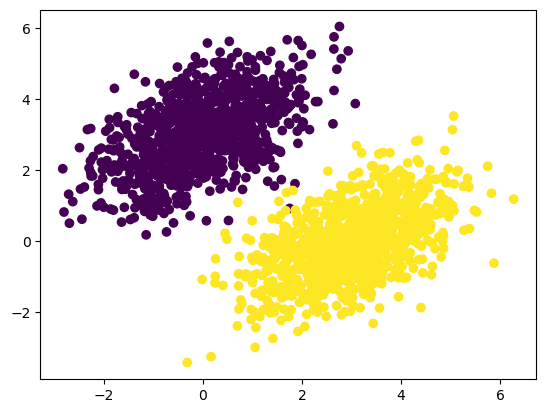

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [6]:
import tensorflow as tf

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


2023-10-05 13:35:23.053567: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 13:35:23.661138: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 13:35:23.661234: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 13:35:23.661353: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 13:35:23.835521: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 13:35:23.836695: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b
